In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [2]:
import time
def true_fun(X):
    return 66 * X
np.random.seed(int(time.time()))
n_samples = 30
X = 40+200*np.sort(np.random.rand(n_samples,1))
Y = true_fun(X) + np.random.randn(n_samples,1) * 2000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


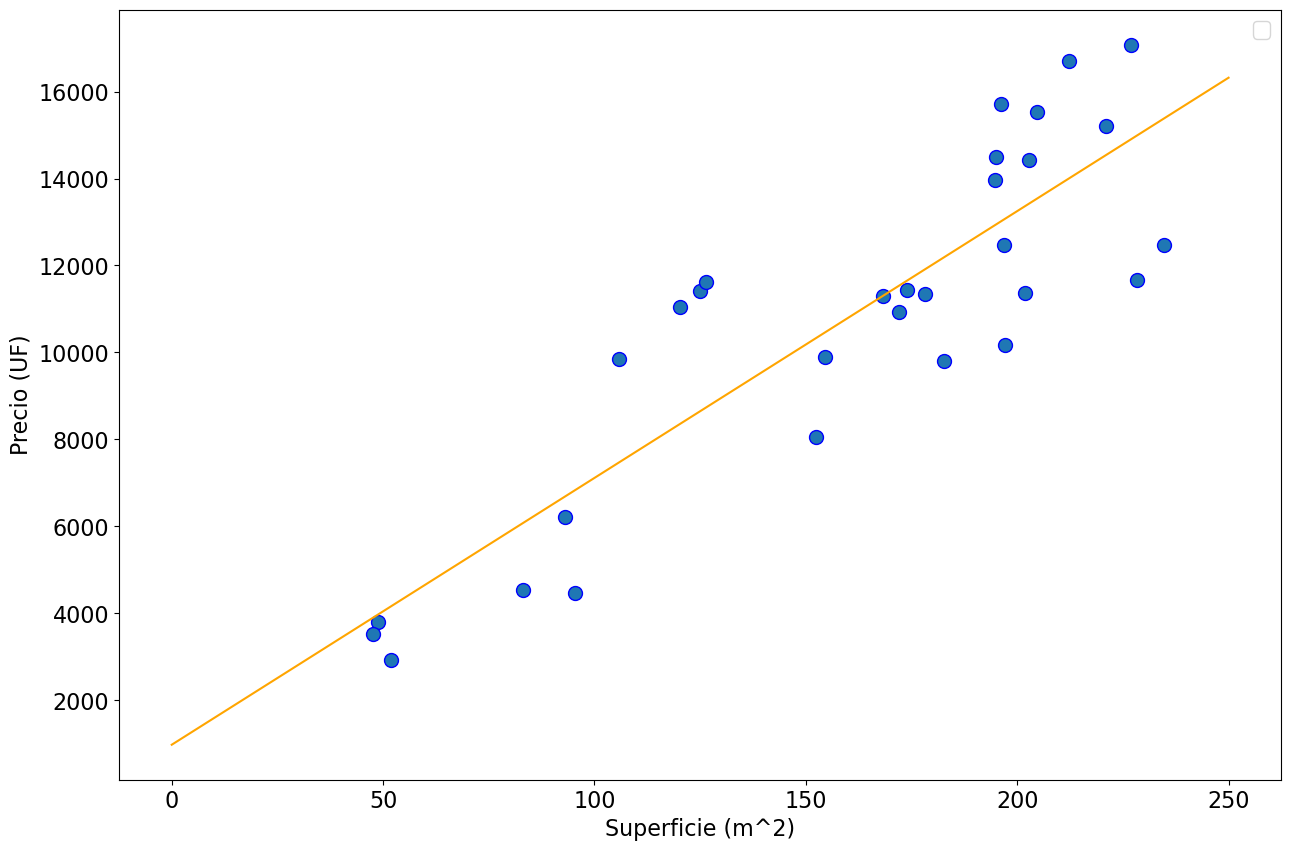

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})
polynomial_features = PolynomialFeatures(degree=1, include_bias=True)
regression = models.LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", regression)])
pipeline.fit(X, Y)
scores = cross_val_score(pipeline, X, Y, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace([0], [250], 100)
plt.plot(X_test, pipeline.predict(X_test), color='orange')
plt.scatter(X, Y, edgecolor='b', s=100)
plt.xlabel("Superficie (m^2)")
plt.ylabel("Precio (UF)")
plt.legend(loc="best")
plt.show()

In [4]:
theta = np.random.randn(1,1)
b = np.random.randn(1,1)
learning_rate = 1e-5
loss = 1e10
iteration = 1
dec = 0.1
while dec < 0.9:
    Y_pred = X.dot(theta) + b
    new_loss = 0.5*np.square(Y_pred - Y).sum()/n_samples
    dec = new_loss/loss
    loss = new_loss
    print("Loss at iteration %d is:" % iteration, loss)

    grad_theta = X.T.dot(Y_pred - Y)/n_samples
    grad_b = (Y_pred - Y).sum(keepdims=True)/n_samples
    theta -= learning_rate * grad_theta
    b -= learning_rate * grad_b
    iteration+=1

Loss at iteration 1 is: 67077900.1144547
Loss at iteration 2 is: 35124528.31069504
Loss at iteration 3 is: 18837296.100728255
Loss at iteration 4 is: 10535388.698011871
Loss at iteration 5 is: 6303750.929721207
Loss at iteration 6 is: 4146805.837912043
Loss at iteration 7 is: 3047370.466206115
Loss at iteration 8 is: 2486967.607985281
Loss at iteration 9 is: 2201319.718981896
Loss at iteration 10 is: 2055719.5844667028


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


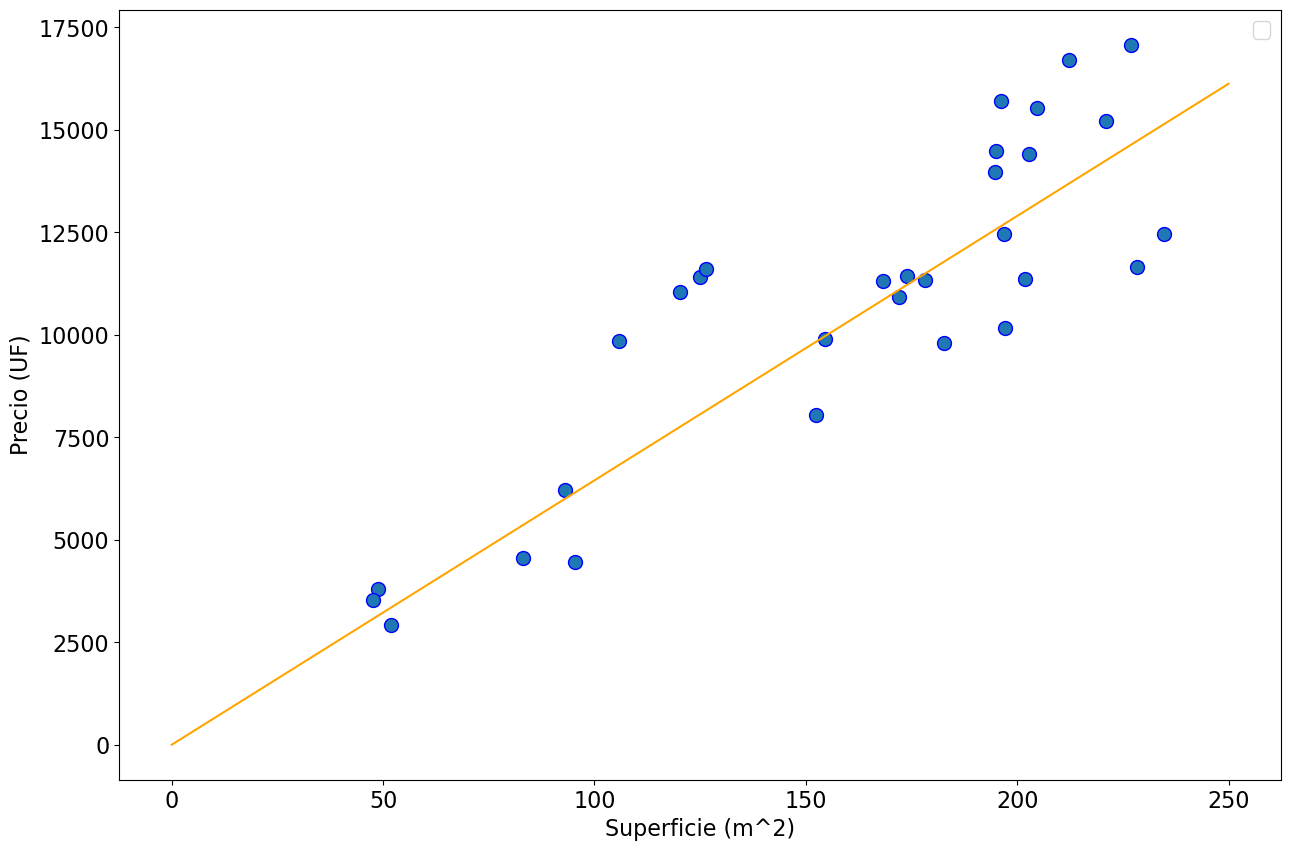

In [5]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})
X_test = np.linspace([0], [250], 100)

plt.plot(X_test, X_test.dot(theta), color='orange')
plt.scatter(X, Y, edgecolor='b', s=100)
plt.xlabel("Superficie (m^2)")
plt.ylabel("Precio (UF)")
plt.legend(loc="best")
plt.show()